**Nombre:** Federico Morlan


# Parte 1


## Consigna:

**Enunciado 5**:  dado el archivo de registros de jugadas (eventos) 
de MemPy, mostrar un gráfico con los usuarios que más veces jugaron el 
juego (independientemente del resultado de la partida.


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import os

d_stats = pd.read_csv(os.path.join(os.getcwd(), 'datos de prueba.csv'))

d_stats.columns

Index(['Tiempo', 'Partida', 'Cantidad total de palabras a adivinar',
       'Nombre de evento', 'Usuarie - nick', 'usuarie -genero',
       'usuarie -edad', 'Estado ', 'Palabra', 'nivel'],
      dtype='object')

In [3]:
# para saber si hay algun valor no válido antes de empezar a trabajar
d_stats.isnull().sum()

Tiempo                                    0
Partida                                   0
Cantidad total de palabras a adivinar     0
Nombre de evento                          0
Usuarie - nick                            0
usuarie -genero                           0
usuarie -edad                             0
Estado                                    7
Palabra                                  14
nivel                                     0
dtype: int64

In [6]:
# como no hay ningun valor no válido en las columnas que nos interesan, seguimos:
# la columna que nos interesa es "Usuarie - nick", y nos interesa acumular la cantidad de coincidencias
# imprimimos los datos sólo para corroborar que luego esté bien graficado
d_stats['Usuarie - nick'].sort_values().value_counts()

jose          31
pepe          20
clara         13
clementina    13
raul           9
flor           8
Name: Usuarie - nick, dtype: int64

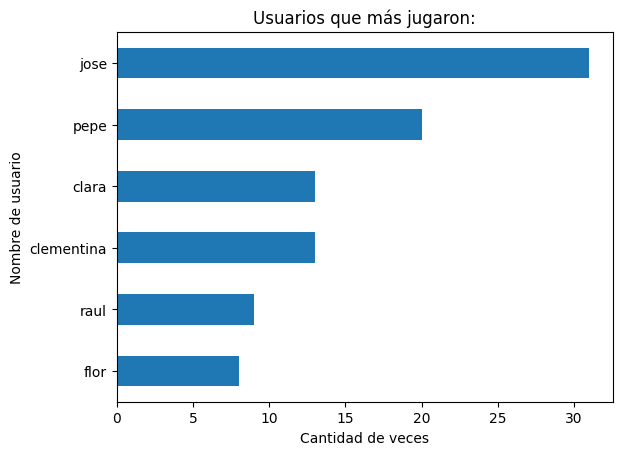

In [36]:
# ahora realizamos el gráfico correspondiente:
datos = d_stats['Usuarie - nick'].sort_values().value_counts().plot(kind="barh")
datos.invert_yaxis()
datos.set_ylabel('Nombre de usuario')
datos.set_xlabel('Cantidad de veces')
datos.set_title('Usuarios que más jugaron:')

plt.show()

# Parte 2

## Enunciado adicional:
dado alguno de los datasets elegidos para el trabajo integrador, mostrar una nube de palabras (con la librería wordcloud) con las palabras elegidas para el juego de acuerdo a alguno de los criterios elegidos en su trabajo.  Considerar utilizar la opción de que se puedan repetir las palabras.


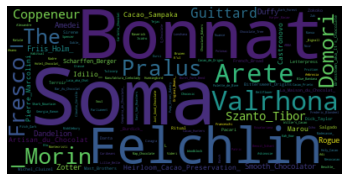

In [49]:
import os
import csv
# from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import matplotlib.pyplot as plt
#% matplotlib inline da error
archivo = open(os.path.join(os.getcwd(), 'flavors_of_cacao.csv'), 'r', encoding='UTF-8')
csv = csv.reader(archivo)
next(csv)

# criterio:empresas de chocolate con mayor variedad de chocolates (3 o más) con rating mayor a 3
# en el trabajo se utilizó un contador, para tomar la cantidad total de apariciones de un nombre como valor
# aqui no hace falta, ya que nos interesa contabilizar la cantidad de veces que aparece esa empresa
datos = list(map(lambda x: x[0], filter(lambda x: float(x[6]) > 3, csv)))

texto = ''

# para que no queden palabras sueltas sino las empresas propiamente dichas:
for dato in datos:
    dato = dato.replace(' ','_')
    texto = texto + dato + ';'

texto = texto.replace(';',' ')
texto = texto.replace('(',' ')
texto = texto.replace(')',' ')

#como hay muchas palabras iguales, hace falta decirle que no tome duplicados como una sola palabra (collocations = False)

wordcloud = WordCloud(collocations=False).generate(texto)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
